<a href="https://colab.research.google.com/github/buthaina279/DS_Capstone_NLP/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Import Libraries

from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
from google.colab import drive  
#import pycountry
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import itertools
from nltk.corpus import stopwords
import nltk
import re

In [13]:
# Connect Google Drive to Colab
drive.mount('/content/gdrive')
# Create a variable to store the data path on your drive
path = './gdrive/My Drive/datasets/new_datasets'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [16]:
airline = pd.read_csv("./gdrive/My Drive/datasets/new_datasets/airline_features.csv")

In [17]:
airline.sample(5)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,tweet_id,created_at,text,likes,retweeted,location,language,airline,string_text,subjectivity,polarity,sentiment,cancel,staff,flight,cost,refund,customrt service,experience
435,435,960,27,1337026813156085761,2020-12-10 13:30:07,"['research', 'prof', 'airline', 'give', 'fearf...",0,False,800 332-7359 • Get free app at,en,British airways,research prof airline give fearful flier usele...,0.600000,-0.700000,Negative,0,0,0,0,1,0,0
261,261,598,20,1337072080672628736,2020-12-10 16:30:00,"['enjoy', 'safe', 'trip', 'favourite', 'destin...",71,False,"Doha, Qatar",en,Qatar airways,enjoy safe trip favourite destination qsuite p...,0.583333,0.300000,Positive,0,0,0,0,0,0,0
84,84,202,179,1334549942472302592,2020-12-03 17:27:55,"['unitedairlines', 'responsible', 'allowing', ...",0,False,"a galaxy far, far away",en,United Airlines,unitedairlines responsible allowing couple cov...,0.547727,0.213636,Positive,0,0,1,0,0,0,0
63,63,170,142,1335271356070383621,2020-12-05 17:14:34,"['photo', 'full', 'flight', 'donotflyunited', ...",1,False,"New York, NY",en,United Airlines,photo full flight donotflyunited pandemic pand...,0.550000,0.350000,Positive,0,0,1,0,0,0,0
531,531,1209,467,1334554225720877057,2020-12-03 17:44:56,"['people', 'still', 'awaiting', 'refund', 'air...",1,False,🇬🇧,en,British airways,people still awaiting refund airway going back...,0.100000,0.100000,Positive,0,0,0,0,1,0,0


#EDA

In [5]:
airline.shape

(787, 22)

In [6]:
airline.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'tweet_id',
       'created_at', 'text', 'likes', 'retweeted', 'location', 'language',
       'airline', 'string_text', 'subjectivity', 'polarity', 'sentiment',
       'cancel', 'staff', 'flight', 'cost', 'refund', 'customrt service',
       'experience'],
      dtype='object')

In [7]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        787 non-null    int64  
 1   Unnamed: 0.1      787 non-null    int64  
 2   Unnamed: 0.1.1    787 non-null    int64  
 3   tweet_id          787 non-null    int64  
 4   created_at        787 non-null    object 
 5   text              787 non-null    object 
 6   likes             787 non-null    int64  
 7   retweeted         787 non-null    bool   
 8   location          595 non-null    object 
 9   language          787 non-null    object 
 10  airline           787 non-null    object 
 11  string_text       787 non-null    object 
 12  subjectivity      787 non-null    float64
 13  polarity          787 non-null    float64
 14  sentiment         787 non-null    object 
 15  cancel            787 non-null    int64  
 16  staff             787 non-null    int64  
 1

In [ ]:
airline.describe()

#Checking missing values

In [18]:
airline.isna().sum()

Unnamed: 0            0
Unnamed: 0.1          0
Unnamed: 0.1.1        0
tweet_id              0
created_at            0
text                  0
likes                 0
retweeted             0
location            192
language              0
airline               0
string_text           0
subjectivity          0
polarity              0
sentiment             0
cancel                0
staff                 0
flight                0
cost                  0
refund                0
customrt service      0
experience            0
dtype: int64

**remove uninforamative variables**




In [19]:
airline = airline.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1)

In [ ]:
#remove na rows
#airline.dropna(inplace=True)

In [ ]:
#Check for missing values
#airline.isna().sum()

In [20]:
airline.sample(5)

,Unnamed: 0.1.1,tweet_id,created_at,text,likes,retweeted,location,language,airline,string_text,subjectivity,polarity,sentiment,cancel,staff,flight,cost,refund,customrt service,experience
508,403,1335221921751949313,2020-12-05 13:58:08,"['luckily', 'caught', 'landor', 'overhead', 'l...",1,False,"Bristol, City of Bristol, UK",en,British airways,luckily caught landor overhead last flight bri...,0.450,0.166667,Positive,0,0,1,0,0,0,0
72,158,1334860574509953025,2020-12-04 14:02:16,"['united', 'airline', 'clean', 'cockpit', 'usi...",1,False,"Mount Vernon, NY",en,United Airlines,united airline clean cockpit using ultraviolet...,0.700,0.383333,Positive,0,0,0,0,0,0,0
387,513,1334594890936721408,2020-12-03 20:26:32,"['great', 'thing', 'ready', 'explored', 'windo...",0,False,Malaysia,en,Qatar airways,great thing ready explored windowwednesday qat...,0.625,0.500000,Positive,0,0,0,0,0,0,0
430,18,1337074621930205186,2020-12-10 16:40:06,"['research', 'prof', 'airline', 'give', 'fearf...",0,False,800 332-7359 • Get free app at,en,British airways,research prof airline give fearful flier usele...,0.600,-0.700000,Negative,0,0,0,0,1,0,0
8,564,1335795518572797953,2020-12-07 03:57:24,"['airline', 'نخدمكم', 'serve', 'love', 'اليوما...",0,False,India,en,Saudia airlines,airline نخدمكم serve love اليومالعالميلذويالإع...,0.600,0.500000,Positive,0,0,0,0,0,0,0


#Pair plot

There is a relation between likes and subjectivity and polarity.

There is a relation between subjectivity and polarity.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


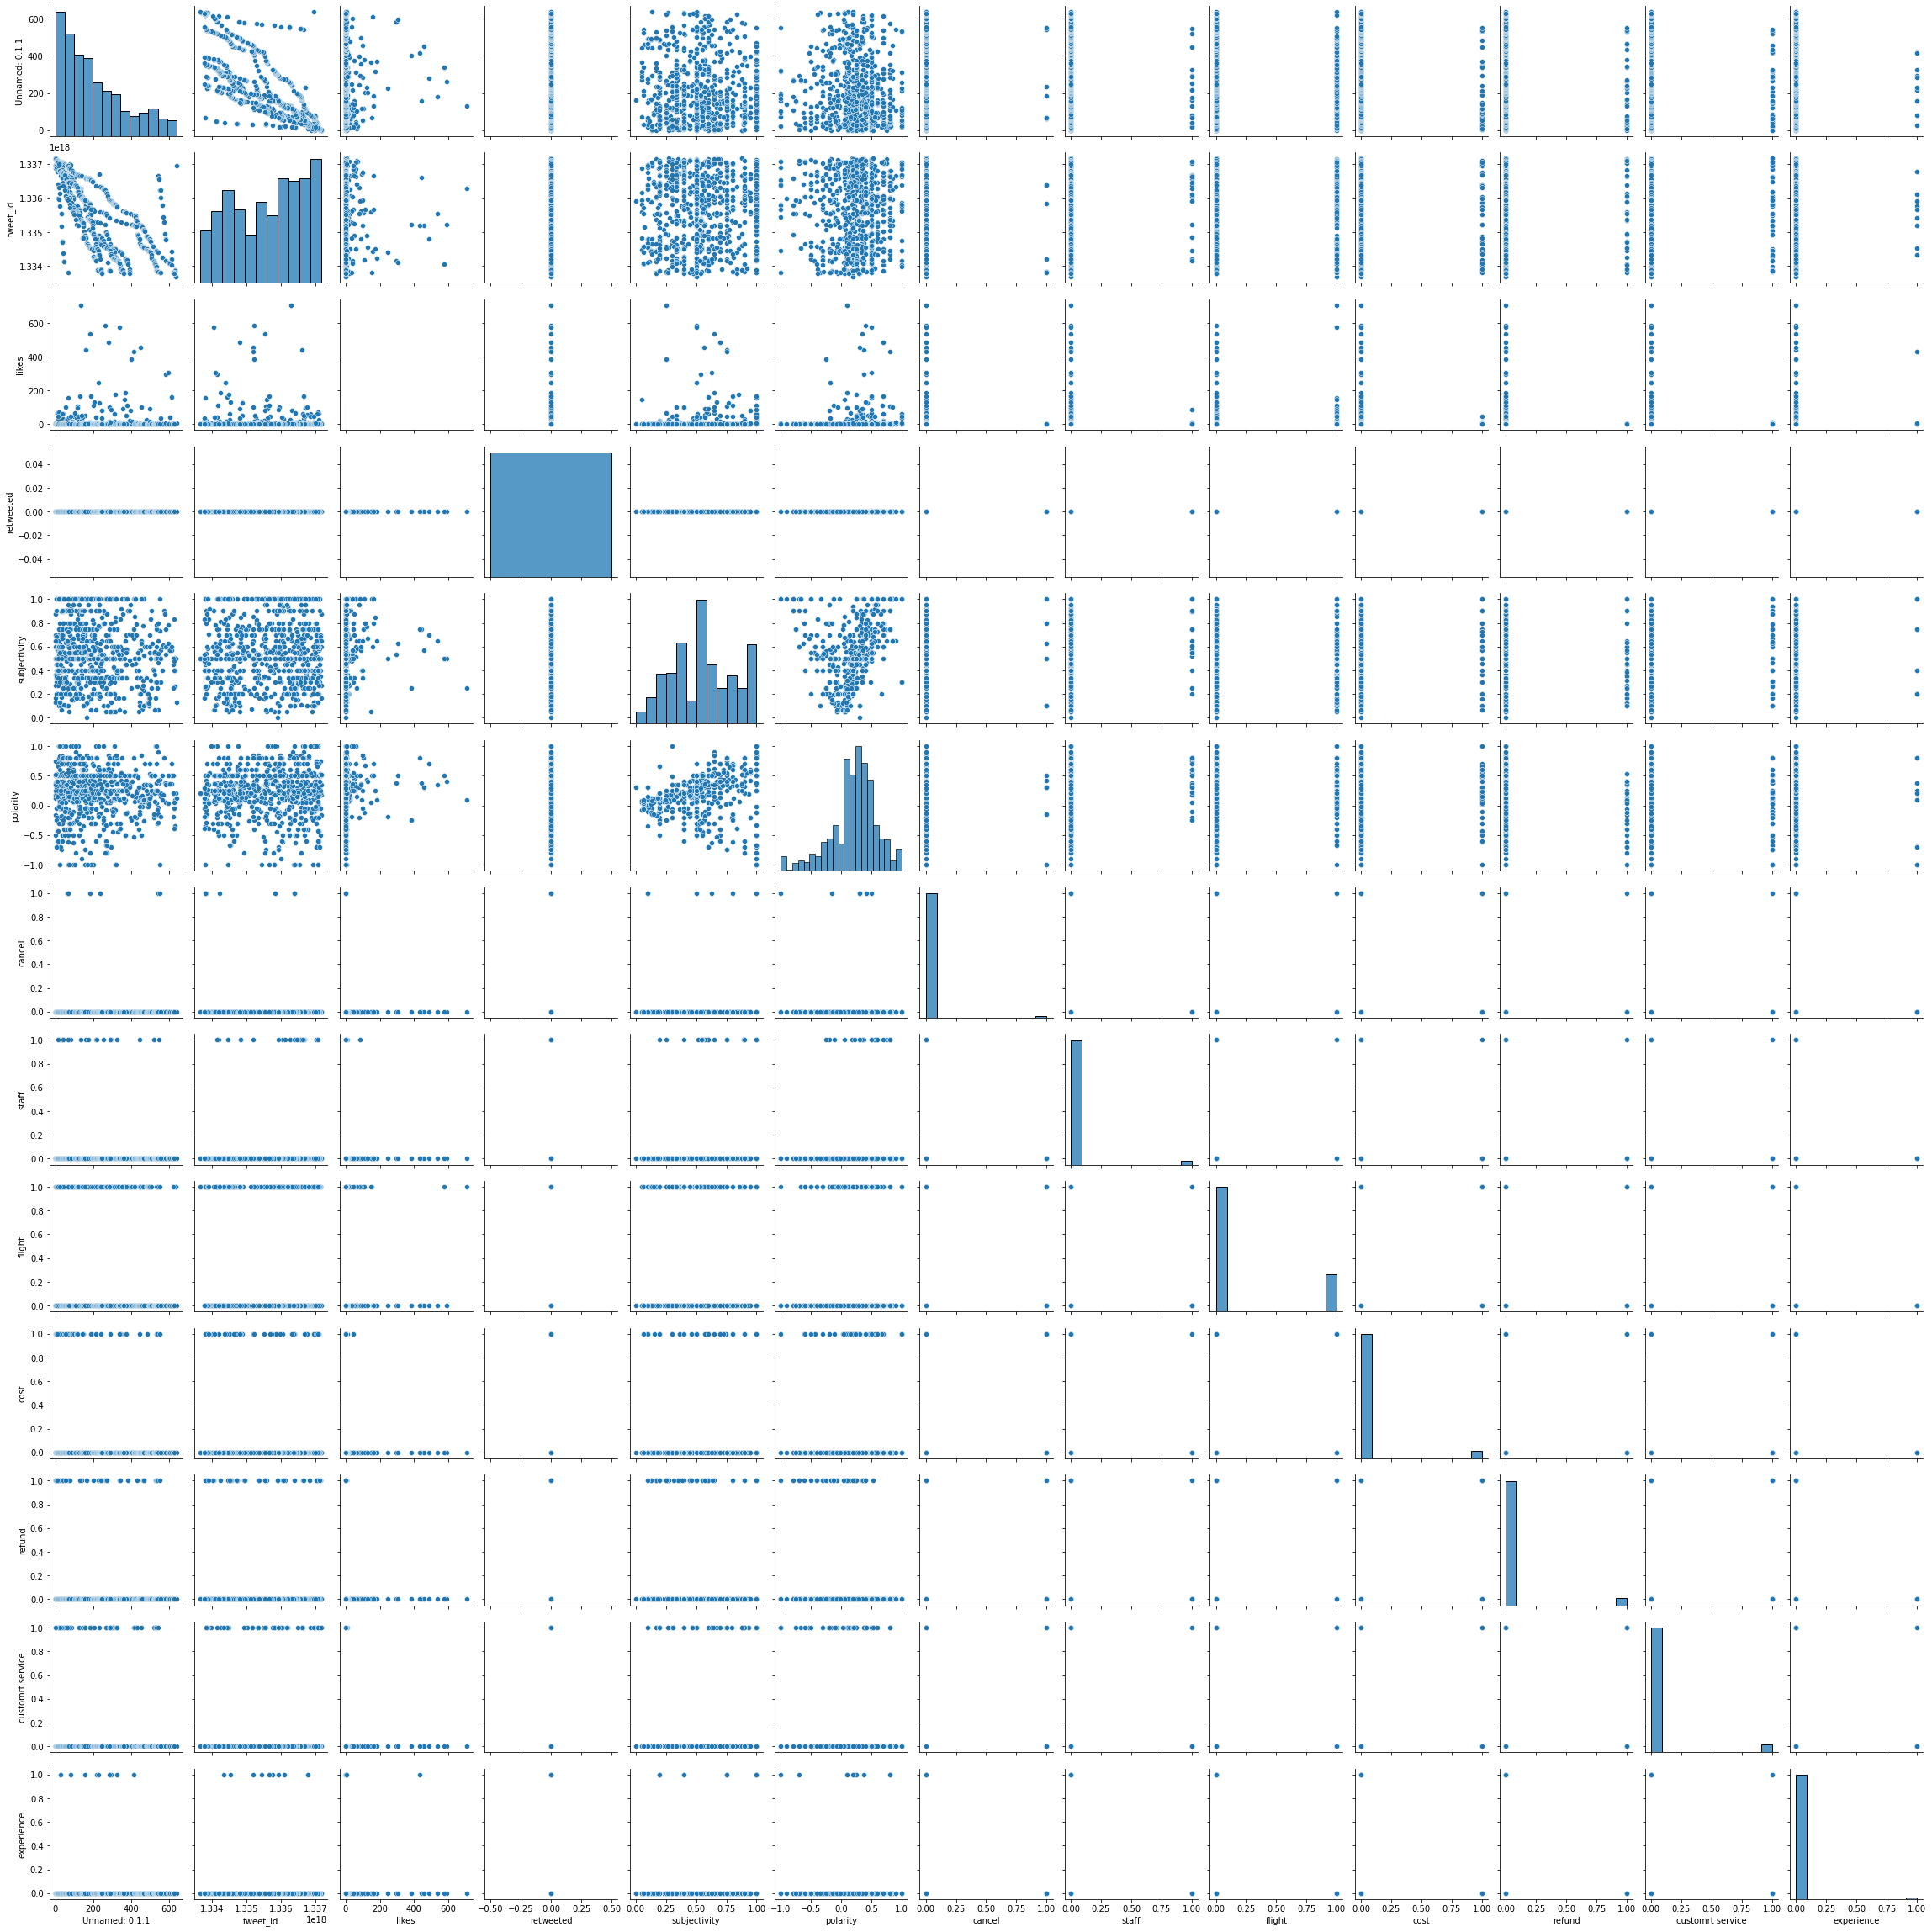

In [21]:
sns.pairplot(airline, size = 2.5)
plt.show()

#Count positive and negative sentiment

the pie chart shows that most of the sentiment are positive with almost 78% and roughly 22% of the tweets are negative. Therefore, thte majority of people are feeling satsfied about the 11 airlines.

In [23]:
color_list = ['#1a9850',
              '#d73027']

one_color = ['#2166ac']

In [22]:
# Data balance
def createPieChartFor(t_df):
    Lst = 100*t_df.value_counts()/len(t_df)
    
    # set data for pie chart
    labels = t_df.value_counts().index.values
    sizes =  Lst 
    
    # set labels
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True, colors = color_list,startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

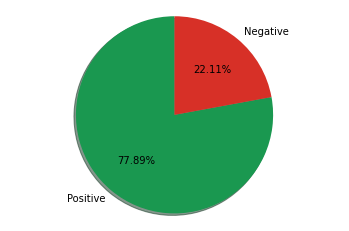

In [24]:
createPieChartFor(airline.sentiment)

#Count airlines


the diagram illustrates the number of tweets for each airline in one week. It is clear that the highest number of tweets are in Qatar airways, British airways, and American airlines. In the other hand, the lowest number of tweets are in fly Dubai, Singapore airlines, and Saudia airlines.

In [83]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

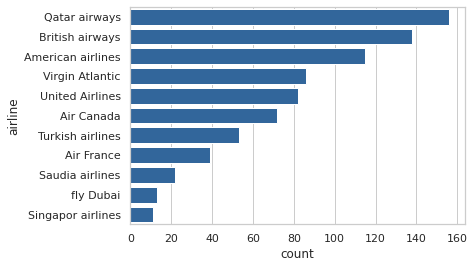

In [85]:
#sort without colors
sns.set_theme(style="whitegrid")
ax = sns.countplot(y="airline",data=airline, palette= one_color, order = airline['airline'].value_counts().index)


**The number of positive and negative tweets per airline**

In [ ]:
#airline_sentiment_df = airline.groupby(['airline','sentiment']).sentiment.count().unstack()
#airline_sentiment_df.plot(kind='bar', color = color_list)
#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

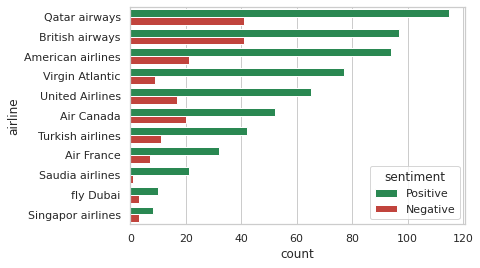

In [26]:
#pos green neg red and put % and sort pos and title airline change y
sns.set_theme(style="whitegrid")
ax = sns.countplot(y="airline",data=airline, hue= 'sentiment',palette= color_list, order = airline['airline'].value_counts().index)

The bar chart shows that as the number of tweets increase the number of positive tweets increase as well

In [ ]:
def createWrdCloudForSentiment(sentiment):
    temp_df = airline[airline.sentiment==sentiment]
    words = " ".join(temp_df.reason)
    
    wrdcld = WordCloud(background_color='white',
                      width=1500,
                      height=1000).generate(words)
    plt.figure(figsize=(10,10))
    plt.imshow(wrdcld)
    plt.axis('off')
    plt.show

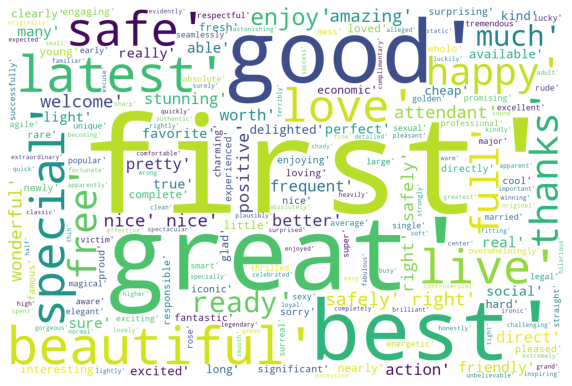

In [ ]:
createWrdCloudForSentiment('Positive')

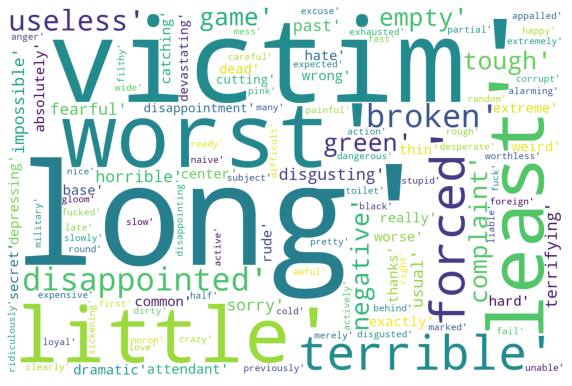

In [ ]:
createWrdCloudForSentiment('Negative')

#Count each reason

This plot shows that most of the tweets are positive since first, great, nice, etc are positive words.

In [28]:
#you have to remove na values first
airline['reason'] = airline['reason'].apply(eval)

In [29]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

Text(0.5, 1.0, 'Reasons')

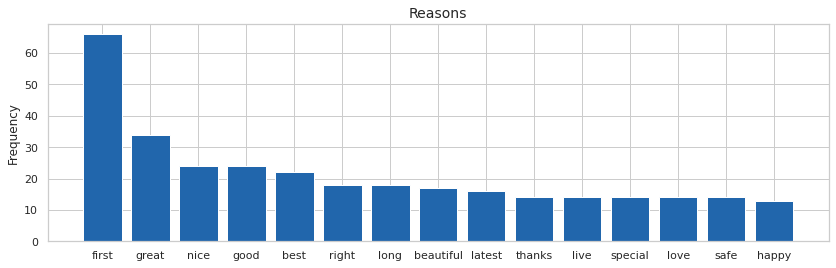

In [30]:
#
n = 15
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(airline['reason']).value_counts()[:n].index, 
       to_1D(airline['reason']).value_counts()[:n].values, color = one_color)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Reasons", size = 14)

#search for specific words to get some features about the airline

- [canceled, cancellation]
- [staff, crew]
- [price, money, cheap, expensive, cost] 
- experience
- service

In [ ]:
#transfom from str to list
airline['text'] = airline['text'].apply(eval)

In [ ]:
#index so I can know the airline 
#word in text
#sentiment 
#reason
# late time waiting
#resumed, restrat
keyword_list = ['payment']
reasons_list = []
for index, airline_list in enumerate(airline['text']):
  if any(word in airline_list for word in keyword_list):
    print(airline_list, airline['sentiment'][index])
    #print(airline['airline'][index]," ", airline['sentiment'][index],airline_list)


**define function** to count the sentimnt for each airline for a number of features 

In [30]:
def getfeatures(feature, keyword_list):
  feature_dict = {}
  feature_dict['feature'] = feature
  for index, airline_list in enumerate(airline['text']):
    if any(word in airline_list for word in keyword_list):
      feature_dict.setdefault("airline", []).append(airline['airline'][index]) 
      feature_dict.setdefault("sentiment", []).append(airline['sentiment'][index])
      #feature_dict.setdefault("reason", []).append(airline['reason'][index])
  feature_df = pd.DataFrame.from_dict(feature_dict)
  #feature_group = feature_df.groupby(['airline','sentiment']).sentiment.count().unstack()
  return feature_df


**cancel**

The bar chart demonstrates that British airways is the highest airline in cancelling flights(2 tweets complain). However, the people does not complain about cancelling flights in United airlines(4 tweets).

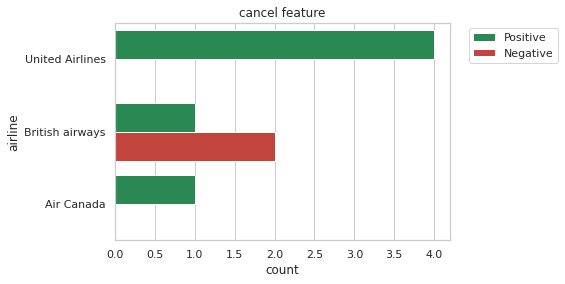

In [31]:
cancel_results = getfeatures("cancel", ['canceled', 'cancellation'])
sns.set_theme(style="whitegrid")
ax = sns.countplot(y="airline",data=cancel_results, hue= 'sentiment',palette= color_list, order = cancel_results['airline'].value_counts().index)
plt.title('cancel feature')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

In [ ]:
#cancel_results = getfeatures("cancel", ['canceled', 'cancellation'])
#cancel_results.plot(kind='bar', color = ['#d73027', '#1a9850'])
#plt.title('cancel feature')
#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

**staff**

Although the polt shows that the staff in the all the four airlines but American airlines is the best with 6 positive tweets.

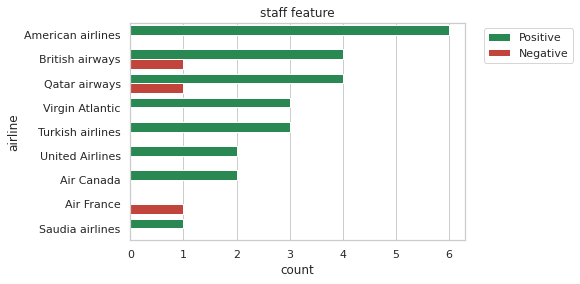

In [32]:
#pos green neg red and put % and sort pos and title airline change y
staff_results = getfeatures("staff", ['staff', 'crew', 'team', 'agent', 'personnel', 'worker', 'workforce', 'employee', 'group'])
sns.set_theme(style="whitegrid")
ax = sns.countplot(y="airline",data=staff_results, hue= 'sentiment',palette= color_list, order = staff_results['airline'].value_counts().index)
plt.title('staff feature')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

**cost** 

The diagram illustrates that Air Canada, Virgin Atlantic, and British airways have the best prices among other airlines with 7 positive tweets. 

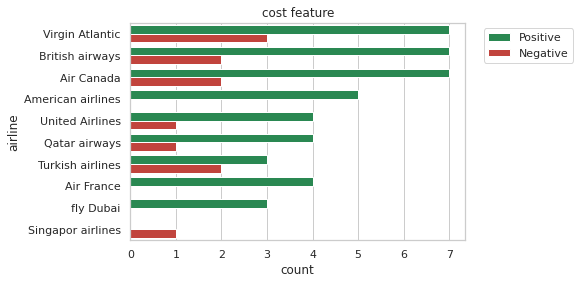

In [34]:

cost_results = getfeatures("cost", ['cost', 'money', 'price', 'expensive', 'cheap','deal', 'offer', 'dollars', 'overpriced', 'underpriced', 'ticket',
                'expense', 'charge', 'value', 'expenditure','cash'])
sns.set_theme(style="whitegrid")
ax = sns.countplot(y="airline",data=cost_results, hue= 'sentiment',palette= ['#1a9850', '#d73027'], order = cost_results['airline'].value_counts().index)
plt.title('cost feature')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

**Customer service**

The bar chart shows that the worst services are in Qatar airways with 10 negative tweets. In the other hand, the best services are in British airways with 7 positive tweets.

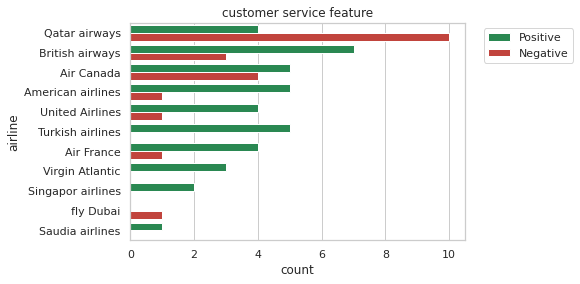

In [42]:
service_results = getfeatures("service",  ['service', 'friendly','customer', 'client', 'care', 'support', 'assistance'])
sns.set_theme(style="whitegrid")
ax = sns.countplot(y="airline",data=service_results, hue= 'sentiment',palette= color_list, order = service_results['airline'].value_counts().index)
plt.title('customer service feature')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

**flight**
British airways and American airlines have the best flight with 40 positive tweets

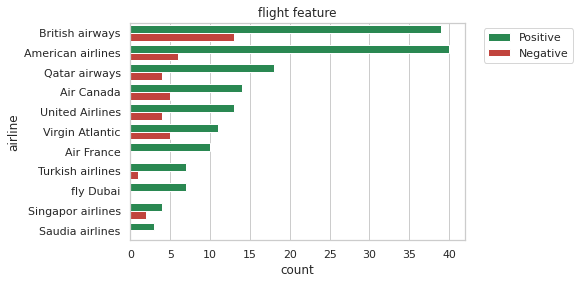

In [43]:
flight_results = getfeatures("flight",  ['flight', 'aviation', 'transport'])
sns.set_theme(style="whitegrid")
ax = sns.countplot(y="airline",data=flight_results, hue= 'sentiment',palette= color_list, order = flight_results['airline'].value_counts().index)
plt.title('flight feature')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

**experience**

The diagram illustrates that there are 4 tweets for a positive experience in Air Canada, making it the best airlines. However, there is one tweet complain about a bad experience in American Airlines and Qatar airways.

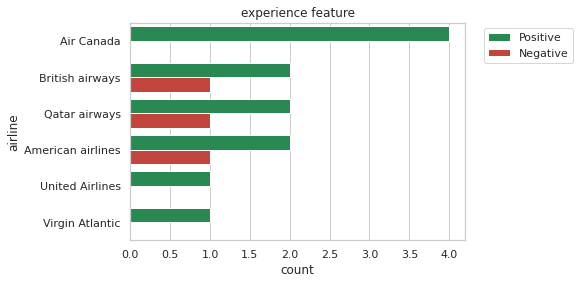

In [36]:
experience_results = getfeatures("experience", ['experience','undergo'])
sns.set_theme(style="whitegrid")
ax = sns.countplot(y="airline",data=experience_results, hue= 'sentiment',palette= color_list, order = experience_results['airline'].value_counts().index)
plt.title('experience feature')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

**refund**


British airways in the best in refunding money based on the polt there are 17 positive *tweets*

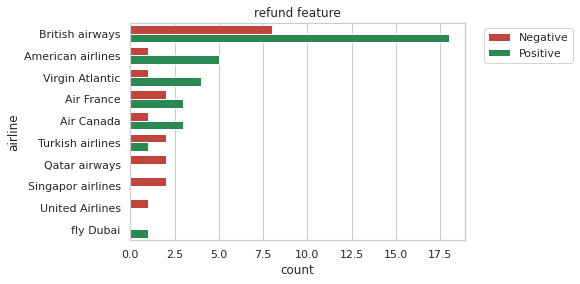

In [40]:
refund_results = getfeatures("refund", ['refund', 'return', 'repayment', 'pay', 'give', 'back', 'repaid'])
sns.set_theme(style="whitegrid")
ax = sns.countplot(y="airline",data=refund_results, hue= 'sentiment',palette= ['#d73027', '#1a9850'], order = refund_results['airline'].value_counts().index)
plt.title('refund feature')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

#Save the dataset

In [46]:
airline.to_csv('airline_EDA.csv')
!cp airline_EDA.csv "./gdrive/My Drive/datasets/new_datasets/"